# Test

In [1]:
cd ../..

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank


In [4]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import *


import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

### Tests

In [5]:
kappas = [1,0.7,0.5,0.5,0.3]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)
nb_place = len(kappas)
pas = 100
c = 0.5
env = Environment_PBM(thetas,kappas)

part0 = [np.array([uniform(0, 1) for i  in range(nb_prop)]), np.array([1]+[uniform(0, 1) for i  in range(1,nb_place)])]

player_TSMH_p_10 = TS_MH_with_effi(nb_prop,nb_place,part0,10)
player_TSMH_p_100 = TS_MH_with_effi(nb_prop,nb_place,part0,100)## c = 3
player_TSMH_s_1 = TS_MH_with_effi(nb_prop,nb_place,part0,10,vari_sigma= False, sigma=1)
player_Oracle = Oracle(env.get_best_index())
player_Random = Random(nb_prop,nb_place)



In [4]:
nb_trial = 1000
nb_game = 3
referee_TSMH_p_10_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_100_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_s_1_1000trials_3games = Referee(env,nb_trial)
referee_Oracle_1000trials_3games = Referee(env,nb_trial)
referee_Random_1000trials_3games = Referee(env,nb_trial)

In [5]:
eff_player_10_1000trials_3games=[]
eff_player_100_1000trials_3games=[]
eff_player_s1_1000trials_3games=[]
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_p_10 = TS_MH_with_effi(nb_prop,nb_place,part0,10)
    player_TSMH_p_100 = TS_MH_with_effi(nb_prop,nb_place,part0,100)
    player_TSMH_s_1 = TS_MH_with_effi(nb_prop,nb_place,part0,10,vari_sigma= False, sigma=1)
    %time print('TSMH_p_10 ',referee_TSMH_p_10_1000trials_3games.play_game(player_TSMH_p_10))
    %time print('TSMH_p_100',referee_TSMH_p_100_1000trials_3games.play_game(player_TSMH_p_100))
    %time print('TSMH_s_1',referee_TSMH_s_1_1000trials_3games.play_game(player_TSMH_s_1))
    %time print ('Oracle', referee_Oracle_1000trials_3games.play_game(player_Oracle))
    %time print('Random',referee_Random_1000trials_3games.play_game(player_Random))
    #print (player_TSMH_p_10.eff[:nb_prop])
    #print (player_TSMH_p_100.eff[:nb_prop])
    eff_player_10_1000trials_3games.append(player_TSMH_p_10.eff)
    eff_player_100_1000trials_3games.append(player_TSMH_p_100.eff)
    eff_player_s1_1000trials_3games.append(player_TSMH_s_1.eff)

#### game 0
TSMH_p_10  0.0
Wall time: 17.9 s
TSMH_p_100 0.03000000000000025
Wall time: 2min 55s
TSMH_s_1 0.03000000000000025
Wall time: 8.2 s
Oracle 0.0
Wall time: 8.98 ms
Random 1.12
Wall time: 20.9 ms
#### game 1
TSMH_p_10  0.0
Wall time: 15.4 s
TSMH_p_100 0.0
Wall time: 2min 37s
TSMH_s_1 0.020000000000000018
Wall time: 8.71 s
Oracle 0.0
Wall time: 8.98 ms
Random 0.52
Wall time: 16 ms
#### game 2
TSMH_p_10  0.0
Wall time: 15.8 s
TSMH_p_100 0.03000000000000025
Wall time: 2min 35s
TSMH_s_1 0.0
Wall time: 7.63 s
Oracle 0.0
Wall time: 9.97 ms
Random 1.29
Wall time: 18.9 ms


In [7]:
nb_trial = 1000
nb_game = 3
referee_TSMH_s1_p_100_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_s01_p_100_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_s01_p_10_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_s001_p_100_1000trials_3games = Referee(env,nb_trial)
referee_TSMH_s001_p_10_1000trials_3games = Referee(env,nb_trial)

eff_player_s1_p_100_1000trials_3games=[]
eff_player_s01_p_100_1000trials_3games=[]
eff_player_s01_p_10_1000trials_3games=[]
eff_player_s001_p_100_1000trials_3games=[]
eff_player_s001_p_10_1000trials_3games=[]
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_s1_p_100= TS_MH_with_effi(nb_prop,nb_place,part0,100,vari_sigma= False, sigma=1)
    player_TSMH_s01_p_100= TS_MH_with_effi(nb_prop,nb_place,part0,100,vari_sigma= False, sigma=0.1)
    player_TSMH_s01_p_10= TS_MH_with_effi(nb_prop,nb_place,part0,10,vari_sigma= False, sigma=0.1)
    player_TSMH_s001_p_100 = TS_MH_with_effi(nb_prop,nb_place,part0,100,vari_sigma= False, sigma=0.01)
    player_TSMH_s001_p_10 = TS_MH_with_effi(nb_prop,nb_place,part0,10,vari_sigma= False, sigma=0.01)
    %time print('TSMH_s1_p_100 ',referee_TSMH_s1_p_100_1000trials_3games.play_game(player_TSMHs_s1_p_100))
    %time print('TSMH_s01_p_100',referee_TSMH_s01_p_100_1000trials_3games.play_game(player_TSMHs_s01_p_100))
    %time print('TSMH_s01_p_10',referee_TSMH_s01_p_10_1000trials_3games.play_game(player_TSMH_s01_p_10))
    %time print('TSMH_s001_p_100',referee_TSMH_s001_p_100_1000trials_3games.play_game(player_TSMH_s001_p_100))
    %time print('TSMH_s001_p_10',referee_TSMH_s001_p_10_1000trials_3games.play_game(player_TSMH_s001_p_10))
 
    eff_player_s1_p_100_1000trials_3games.append(player_TSMHs_s1_p_100.eff)
    eff_player_s01_p_100_1000trials_3games.append(player_TSMHs_s01_p_100.eff)
    eff_player_s01_p_10_1000trials_3games.append(player_TSMH_s01_p_10.eff)
    eff_player_s001_p_100_1000trials_3games.append(player_TSMH_s001_p_100.eff)
    eff_player_s001_p_10_1000trials_3games.append(player_TSMH_s001_p_10.eff)

#### game 0
TSMH_s1_p_100  0.0
Wall time: 1min 19s
TSMH_s01_p_100 0.0
Wall time: 2min 52s
TSMH_s01_p_10 0.0
Wall time: 16.3 s
TSMH_s001_p_100 0.0
Wall time: 3min 24s
TSMH_s001_p_10 0.0
Wall time: 20.9 s
#### game 1
TSMH_s1_p_100  0.0
Wall time: 1min 23s
TSMH_s01_p_100 0.0
Wall time: 2min 46s
TSMH_s01_p_10 0.0
Wall time: 17.3 s
TSMH_s001_p_100 0.0
Wall time: 2min 54s
TSMH_s001_p_10 0.17000000000000015
Wall time: 18.2 s
#### game 2
TSMH_s1_p_100  0.0
Wall time: 1min 19s
TSMH_s01_p_100 0.0
Wall time: 29min 18s
TSMH_s01_p_10 0.0
Wall time: 14.8 s
TSMH_s001_p_100 0.020000000000000018
Wall time: 2min 43s
TSMH_s001_p_10 0.0
Wall time: 16.8 s


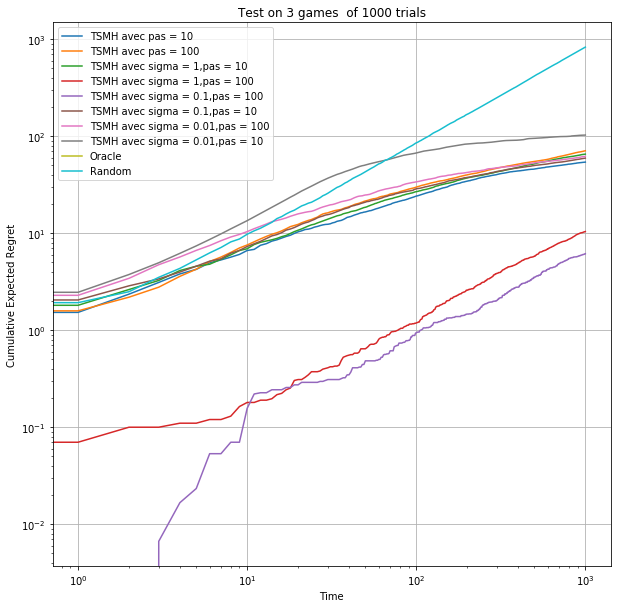

In [11]:
trials = [i for i in range(referee_TSMH_p_10_1000trials_3games.nb_trials)]
plt.figure(figsize=(10, 10))
plt.plot(trials, np.cumsum(referee_TSMH_p_10_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec pas = 10')
plt.plot(trials, np.cumsum(referee_TSMH_p_100_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s_1_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 1,pas = 10')
plt.plot(trials, np.cumsum(referee_TSMH_s1_p_100_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 1,pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s01_p_100_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.1,pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s01_p_10_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.1,pas = 10')
plt.plot(trials, np.cumsum(referee_TSMH_s001_p_100_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.01,pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s001_p_10_1000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.01,pas = 10')

plt.plot(trials, np.cumsum(referee_Oracle_1000trials_3games.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_1000trials_3games.get_regret_expected(), axis=0)[trials], label='Random')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

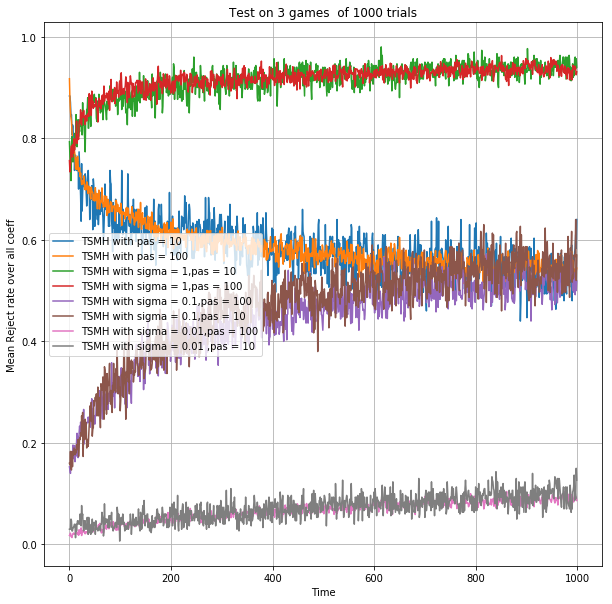

In [14]:
trials = [i for i in range(referee_TSMH_p_10_1000trials_3games.nb_trials)]
plt.figure(figsize=(10, 10))

plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_10_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with pas = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_100_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s1_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 1,pas = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s1_p_100_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 1,pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s01_p_100_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.1,pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s01_p_10_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.1,pas = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s001_p_100_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.01,pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s001_p_10_1000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.01 ,pas = 10')


plt.xlabel('Time')
plt.ylabel('Mean Reject rate over all coeff')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()
        

In [15]:
nb_trial = 5000
nb_game = 3
referee_TSMH_p_10_5000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_100_5000trials_3games  = Referee(env,nb_trial)
referee_Oracle_5000trials_3games  = Referee(env,nb_trial)
referee_Random_5000trials_3games = Referee(env,nb_trial)

In [16]:
eff_player_10_5000trials_3games = []
eff_player_100_5000trials_3games = []
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_p_10 = TS_MH_with_effi(nb_prop,nb_place,part0,10)
    player_TSMH_p_100 = TS_MH_with_effi(nb_prop,nb_place,part0,100)
    %time print('TSMH_p_10 ',referee_TSMH_p_10_5000trials_3games.play_game(player_TSMH_p_10))
    %time print('TSMH_p_100',referee_TSMH_p_100_5000trials_3games.play_game(player_TSMH_p_100))
    %time print ('Oracle', referee_Oracle_5000trials_3games.play_game(player_Oracle))
    %time print('Random',referee_Random_5000trials_3games.play_game(player_Random))
    eff_player_10_5000trials_3games.append(player_TSMH_p_10.eff)
    eff_player_100_5000trials_3games.append(player_TSMH_p_100.eff)

#### game 0
TSMH_p_10  0.03000000000000025
Wall time: 1min 22s
TSMH_p_100 0.0
Wall time: 14min 36s
Oracle 0.0
Wall time: 42.9 ms
Random 0.3600000000000001
Wall time: 88.8 ms
#### game 1
TSMH_p_10  0.0
Wall time: 1min 29s
TSMH_p_100 0.0
Wall time: 13min 37s
Oracle 0.0
Wall time: 48.9 ms
Random 0.55
Wall time: 102 ms
#### game 2
TSMH_p_10  0.0
Wall time: 1min 22s
TSMH_p_100 0.0
Wall time: 13min 48s
Oracle 0.0
Wall time: 52.7 ms
Random 0.6800000000000002
Wall time: 90.7 ms


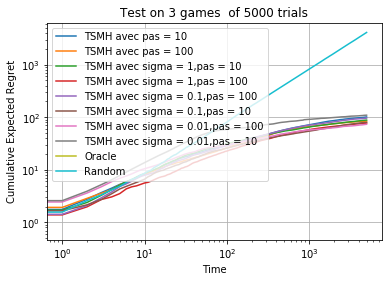

In [21]:
trials = [i for i in range(referee_TSMH_p_10_5000trials_3games.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_p_10_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec pas = 10')
plt.plot(trials, np.cumsum(referee_TSMH_p_100_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s1_p_10_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 1,pas = 10')
plt.plot(trials, np.cumsum(referee_TSMH_s1_p_100_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 1,pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s01_p_100_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.1,pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s01_p_10_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.1,pas = 10')
plt.plot(trials, np.cumsum(referee_TSMH_s001_p_100_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.01,pas = 100')
plt.plot(trials, np.cumsum(referee_TSMH_s001_p_10_5000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec sigma = 0.01,pas = 10')

plt.plot(trials, np.cumsum(referee_Oracle_5000trials_3games.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_5000trials_3games.get_regret_expected(), axis=0)[trials], label='Random')


plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

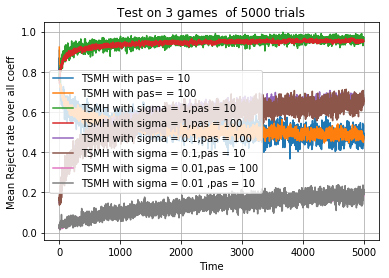

In [22]:
trials = [i for i in range(referee_TSMH_p_10_5000trials_3games.nb_trials)]
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_10_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with pas= = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_100_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with pas= = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s1_p_10_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 1,pas = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s1_p_100_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 1,pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s01_p_100_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.1,pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s01_p_10_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.1,pas = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s001_p_100_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.01,pas = 100')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_s001_p_10_5000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with sigma = 0.01 ,pas = 10')



plt.xlabel('Time')
plt.ylabel('Mean Reject rate over all coeff')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()
        

In [15]:
nb_trial = 10000
nb_game = 3
referee_TSMH_p_10_10000trials_3games = Referee(env,nb_trial)
referee_TSMH_p_100_10000trials_3games  = Referee(env,nb_trial)
referee_Oracle_10000trials_3games  = Referee(env,nb_trial)
referee_Random_10000trials_3games = Referee(env,nb_trial)

In [16]:
eff_player_10_10000trials_3games = []
eff_player_100_10000trials_3games = []
for i in range(nb_game):
    print ('#### game '+str(i))
    player_TSMH_p_10 = TS_MH_with_effi(nb_prop,nb_place,part0,10)
    player_TSMH_p_100 = TS_MH_with_effi(nb_prop,nb_place,part0,100)
    %time print('TSMH_p_10 ',referee_TSMH_p_10_10000trials_3games.play_game(player_TSMH_p_10))
    %time print('TSMH_p_100',referee_TSMH_p_100_10000trials_3games.play_game(player_TSMH_p_100))
    %time print ('Oracle', referee_Oracle_10000trials_3games.play_game(player_Oracle))
    %time print('Random',referee_Random_10000trials_3games.play_game(player_Random))
    eff_player_10_10000trials_3games.append(player_TSMH_p_10.eff)
    eff_player_100_10000trials_3games.append(player_TSMH_p_100.eff)

#### game 0
TSMH_p_10  0.0
Wall time: 4min 17s
TSMH_p_100 0.0
Wall time: 43min 3s
Oracle 0.0
Wall time: 125 ms
Random 0.9300000000000002
Wall time: 258 ms
#### game 1
TSMH_p_10  0.0
Wall time: 4min 35s
TSMH_p_100 0.0
Wall time: 29min 11s
Oracle 0.0
Wall time: 95.8 ms
Random 0.3600000000000003
Wall time: 164 ms
#### game 2
TSMH_p_10  0.0
Wall time: 2min 46s
TSMH_p_100 0.0
Wall time: 37min 30s
Oracle 0.0
Wall time: 129 ms
Random 0.6000000000000001
Wall time: 199 ms


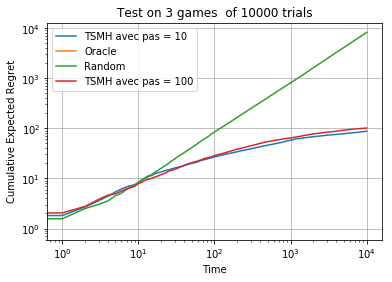

In [19]:
trials = [i for i in range(referee_TSMH_p_10_10000trials_3games.nb_trials)]
plt.plot(trials, np.cumsum(referee_TSMH_p_10_10000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec pas = 10')
plt.plot(trials, np.cumsum(referee_Oracle_10000trials_3games.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_10000trials_3games.get_regret_expected(), axis=0)[trials], label='Random')
plt.plot(trials, np.cumsum(referee_TSMH_p_100_10000trials_3games.get_regret_expected(), axis=0)[trials], label='TSMH avec pas = 100')

plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
        

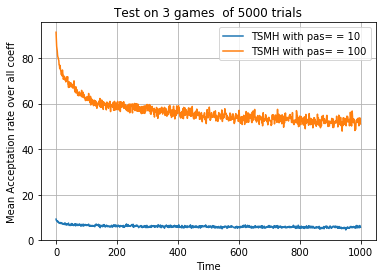

In [66]:
trials = [i for i in range(referee_TSMH_p_10_10000trials_3games.nb_trials)]
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_10_10000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with pas= = 10')
plt.plot(trials, np.mean(np.transpose(np.mean(np.array(eff_player_100_10000trials_3games),axis=0))[:nb_prop],axis=0)[trials], label='TSMH with pas= = 100')

plt.xlabel('Time')
plt.ylabel('Mean Acceptation rate over all coeff')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
#plt.loglog()
plt.show()
        

### Record Logs

In [67]:
cd Test/interaction/result/eval_tauxaccept/

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\eval_tauxaccept


In [ ]:
referee_TSMH_p_100.get_regret_expected()

In [94]:
dict_regret_for_tauxaccept_1000trials_3games = {'TSMH_p_100':list(referee_TSMH_p_100.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_p_10.get_regret_expected())}

dict_tauxaccept_for_tauxaccept_1000trials_3games = {'TSMH_p_100':list(eff_player_100_1000trials_3games),
 'TSMH_p_10':list(eff_player_10_1000trials_3games))}



In [95]:
with open('referee_TSMH_AR_p_100_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_100.record_results, file)
with open('referee_TSMH_AR_p_10_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_p_10.record_results, file)
with open('regret_for_tauxaccept_1000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_for_tauxaccept_1000trials_3games, file) 
with open('dict_for_tauxaccept_1000trials_3games.txt', 'w') as file:
    json.dump(dict_for_tauxaccept_1000trials_3games, file) 
    

TypeError: Object of type ndarray is not JSON serializable

In [46]:
dict_regret_vari_pas_1000trials_3games = {'TSMH_p_100':list(referee_TSMH.get_regret_expected()),
 'TSMH_p_10':list(referee_TSMH_10.get_regret_expected()),
 'TSMH_p_1000':list(referee_TSMH_1000.get_regret_expected()),
 'E_greedy':list(referee_E_greedy.get_regret_expected()),
 'TS':list(referee_TS.get_regret_expected())}


In [47]:
with open('referee_TSMH_p_100_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH.record_results, file)
with open('referee_TSMH_p_10_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_10.record_results, file)
with open('referee_TSMH_p_1000_1000trials_3games.txt', 'w') as file:
    json.dump(referee_TSMH_1000.record_results, file)
with open('referee_E_greedy_1000trials_3game.txt', 'w') as file:
    json.dump(referee_E_greedy.record_results, file)
with open('referee_TS_1000trials_3game.txt', 'w') as file:
    json.dump(referee_TS.record_results, file)
with open('regret_vari_pas_1000trials_3games.txt', 'w') as file:
    json.dump(dict_regret_vari_pas_1000trials_3games, file)

